### Importing Necessary Libraries and Reading Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer, QuantileTransformer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [2]:
data =  pd.read_csv("C:/Users/KRIZAL/Desktop/DSA/Assignment/titanic_dataset_crossval.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.drop(["PassengerId", "Name"], axis = 1, inplace =True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis 

In [8]:
# Numerical features


num_feature = [features for features in data.columns if data[features].dtypes!="O" and features !='Survived']
print("Numerical Columns are : ", num_feature)



# Categorical Columns

cat_feature = [features for features in data.columns if data[features].dtypes=="O" and features !='Survived']
print("\nCategorical columns are :", cat_feature)

Numerical Columns are :  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Categorical columns are : ['Sex', 'Ticket', 'Cabin', 'Embarked']


C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

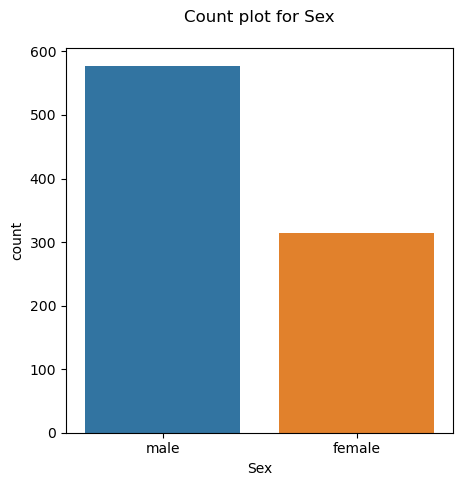

C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


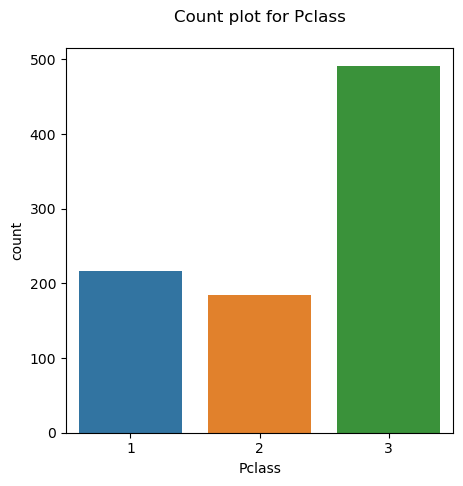

C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


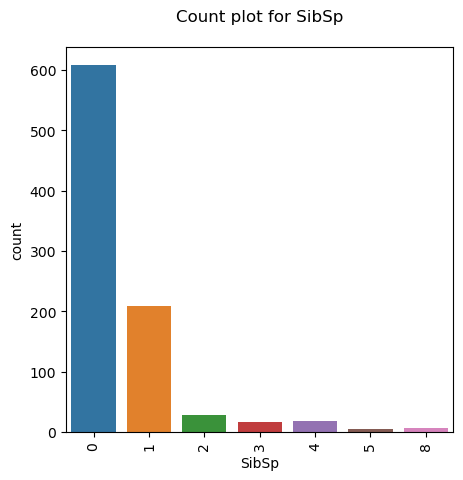

C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


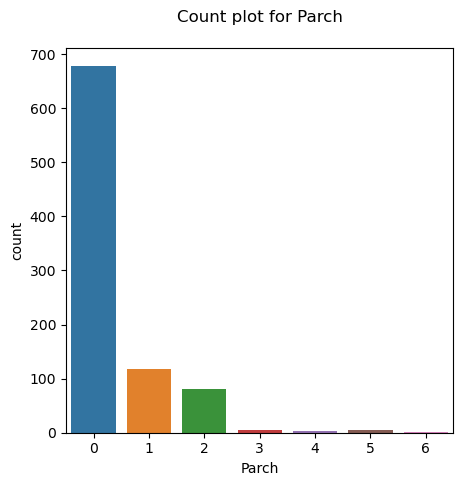

C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


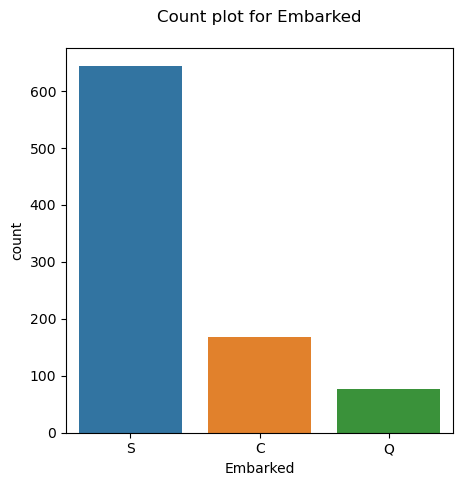

In [9]:
fig = plt.figure()

# Plotting Sex attribute

plt.figure(figsize=(5,5))
sns.countplot(data["Sex"])
plt.title("Count plot for Sex\n")
plt.show()


# Plotting Pclass attribute

plt.figure(figsize=(5,5))
sns.countplot(data["Pclass"])
plt.title("Count plot for Pclass\n")
plt.show()



# Plotting SibSp attribute

plt.figure(figsize=(5,5))
sns.countplot(data["SibSp"])
plt.xticks(rotation = 90)
plt.title("Count plot for SibSp\n")
plt.show()



# Plotting Parch attribute

plt.figure(figsize=(5,5))
sns.countplot(data["Parch"])
plt.title("Count plot for Parch\n")
plt.show()



# Plotting Embarked attribute

plt.figure(figsize=(5,5))
sns.countplot(data["Embarked"])
plt.title("Count plot for Embarked\n")
plt.show()

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

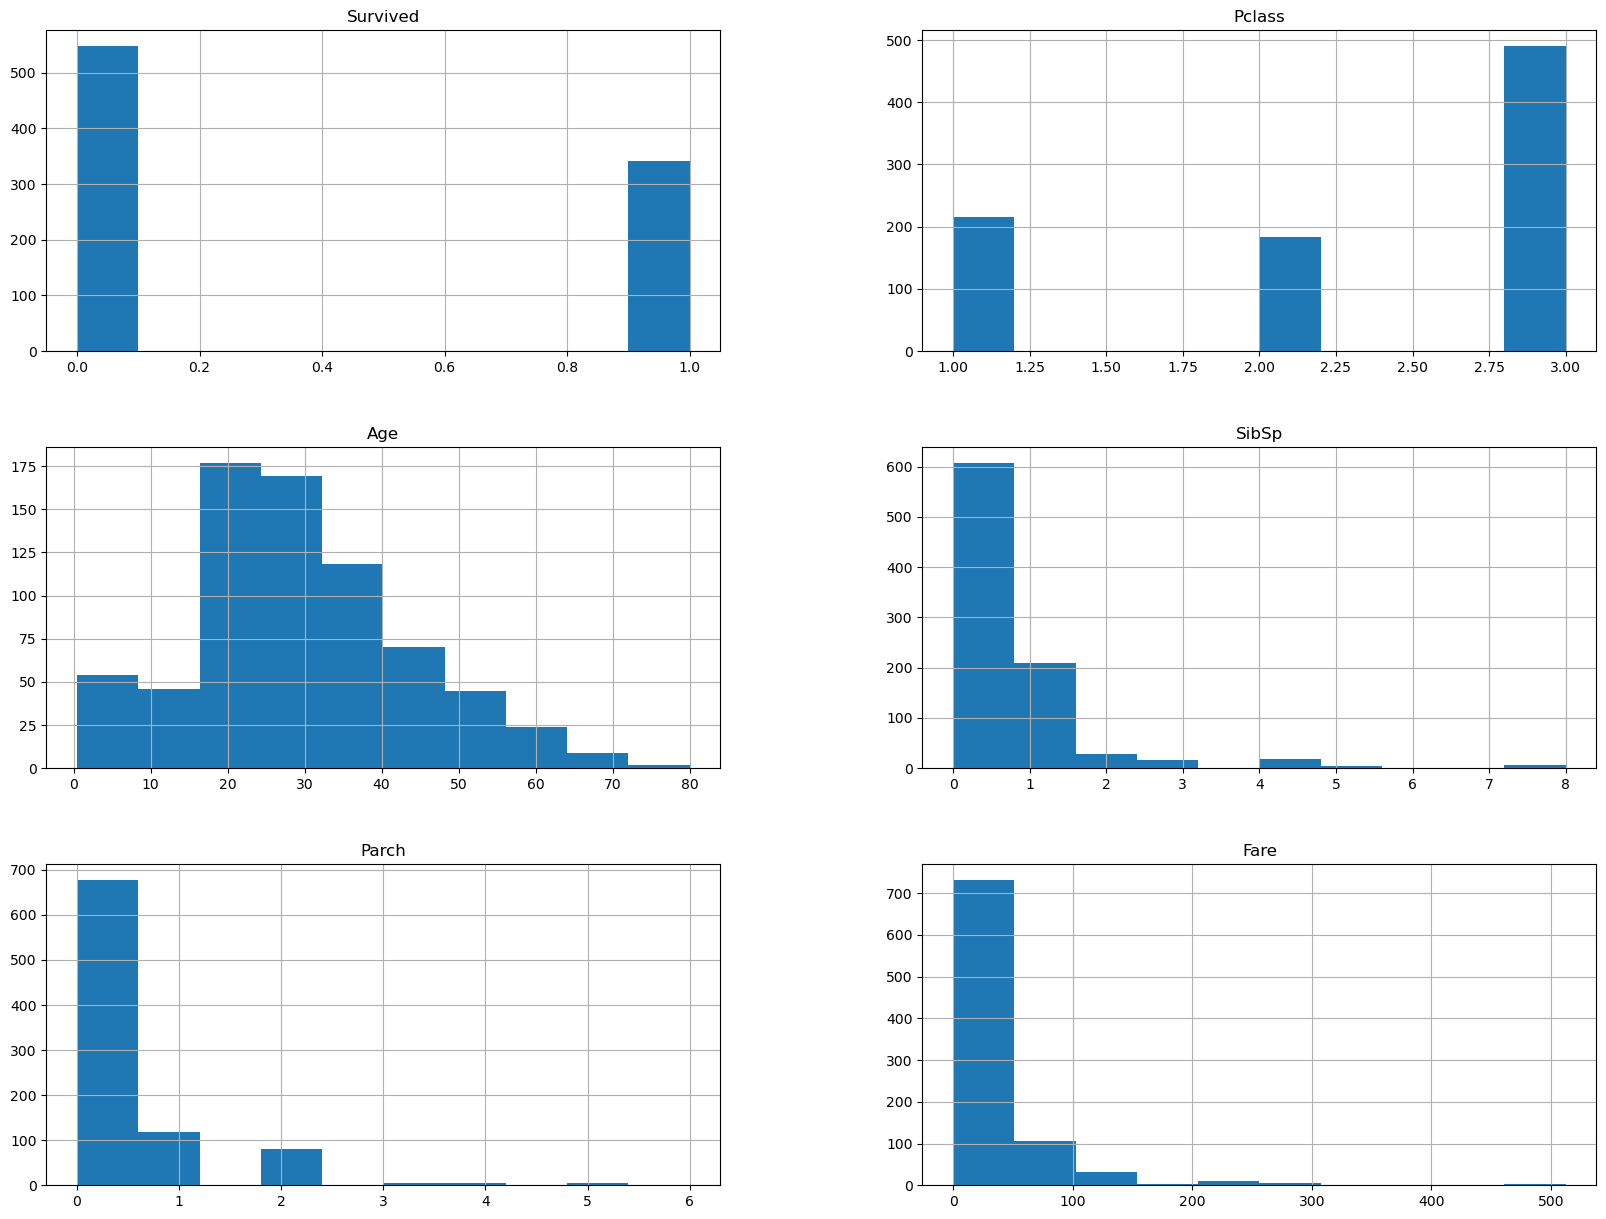

In [10]:
freq_graph = data.select_dtypes(include = ["float", "int"])
freq_graph.hist(figsize = (20, 15))

In [11]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

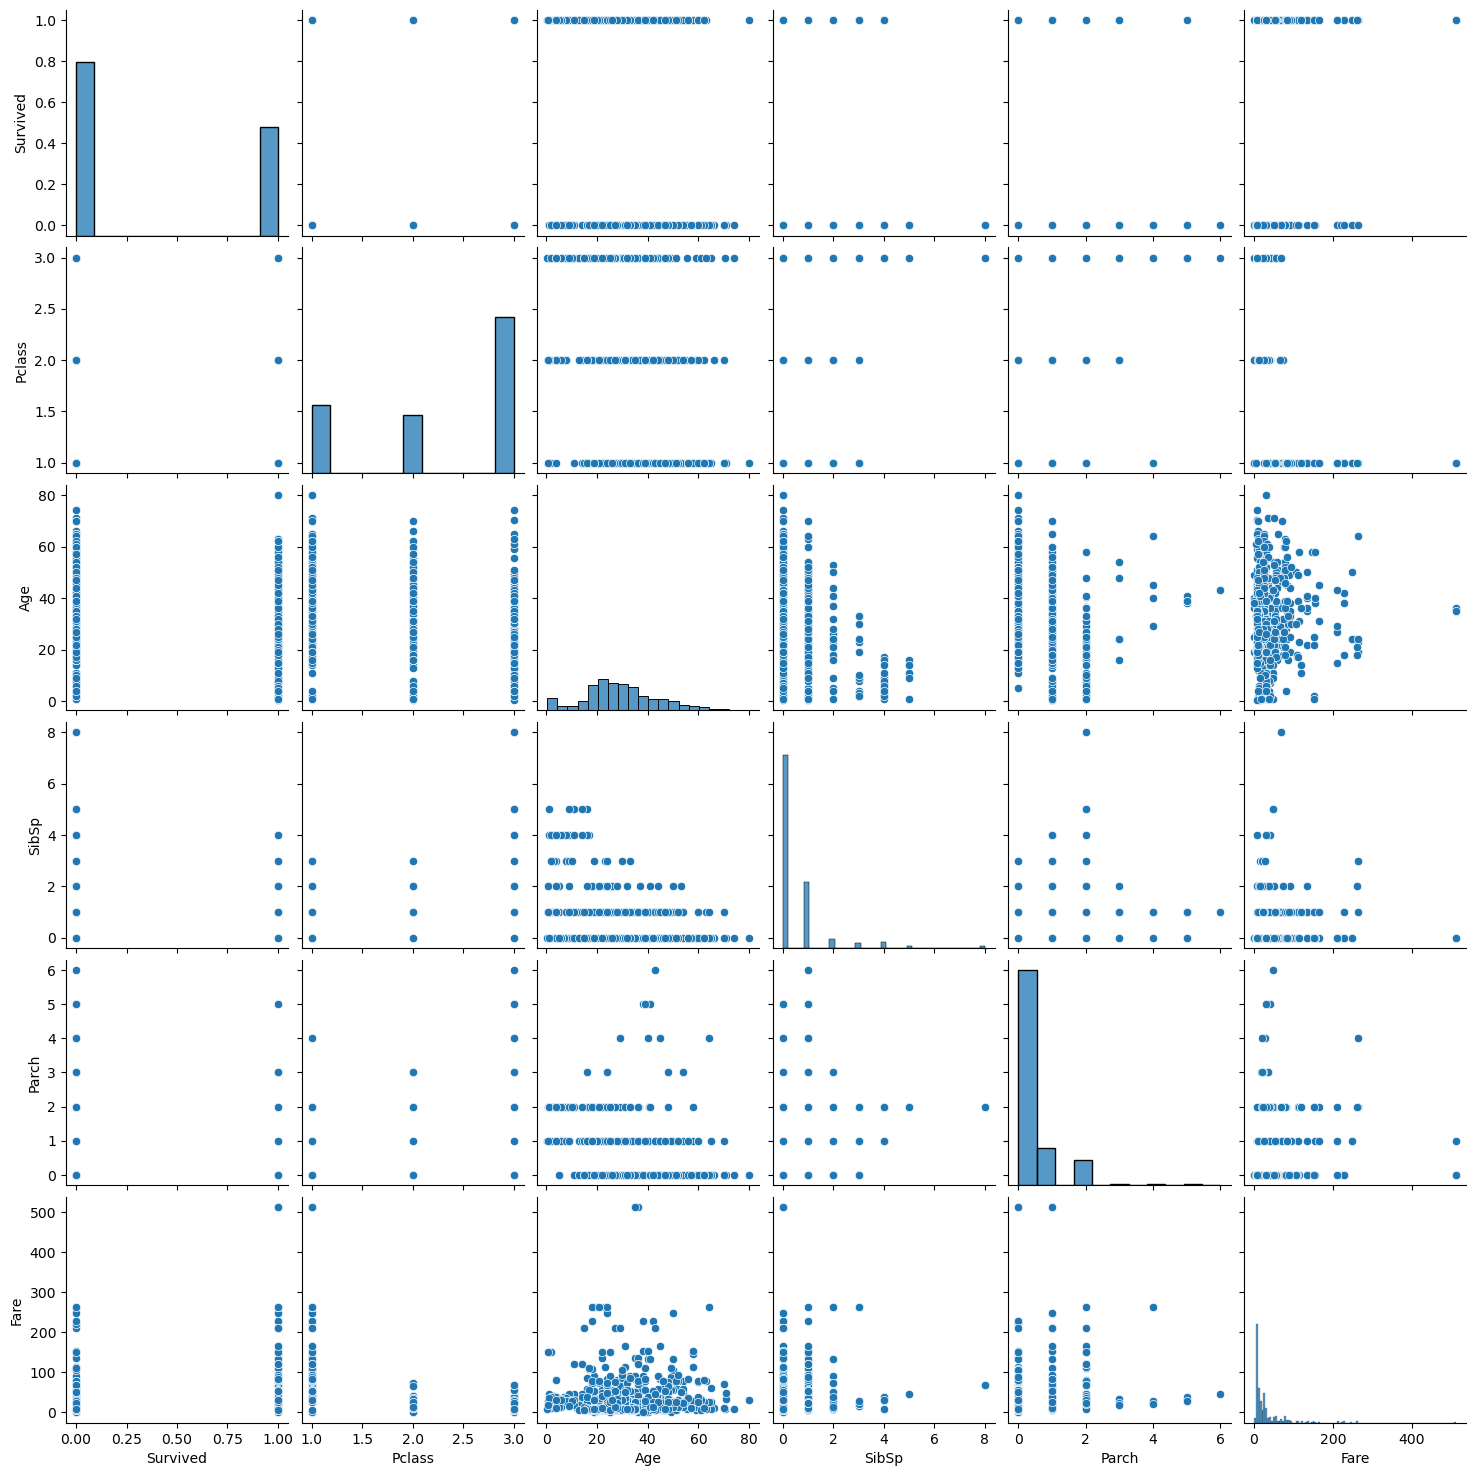

In [12]:
sns.pairplot(data)

### Preprocessing the Data

In [13]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
for i in ["Embarked", "Cabin"]:
    un = data[i].unique()
    print("\nUnique values of {}".format(i),"are", un)


Unique values of Embarked are ['S' 'C' 'Q' nan]

Unique values of Cabin are [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28'

**Filling the missing values**

In [15]:
# filling with median


data["Age"] = data["Age"].fillna(data["Age"].median())


# filling with mode

for i in ["Cabin", "Embarked"]:
    data[i] = data[i].fillna(data[i].mode()[0])
    
    
    
#Again Checking for Null values

data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

**Checking Skewness**

In [16]:
data.mean()

C:\Users\KRIZAL\AppData\Local\Temp\ipykernel_25220\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Survived     0.383838
Pclass       2.308642
Age         29.361582
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

0.4785234382949897
-0.6305479068752845
0.5102446555756495
3.6953517271630565
2.7491170471010933
4.787316519674893


C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


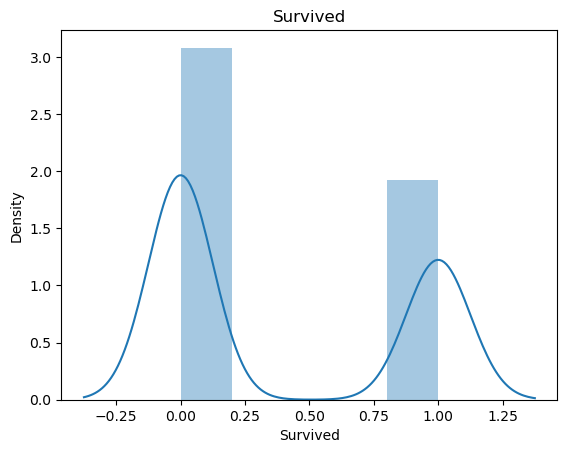

C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


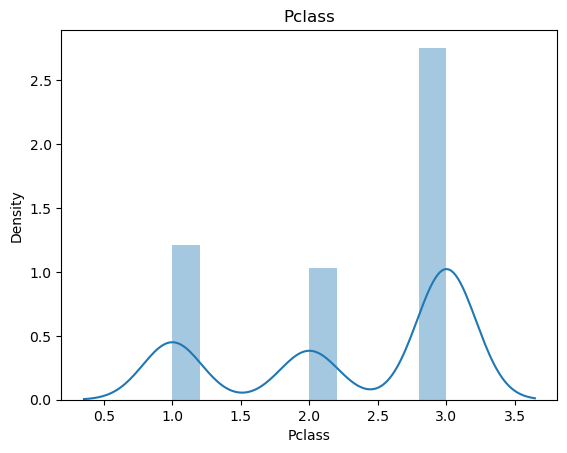

C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


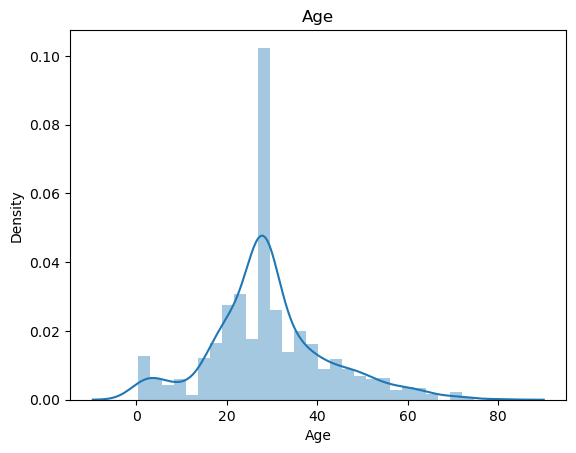

C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


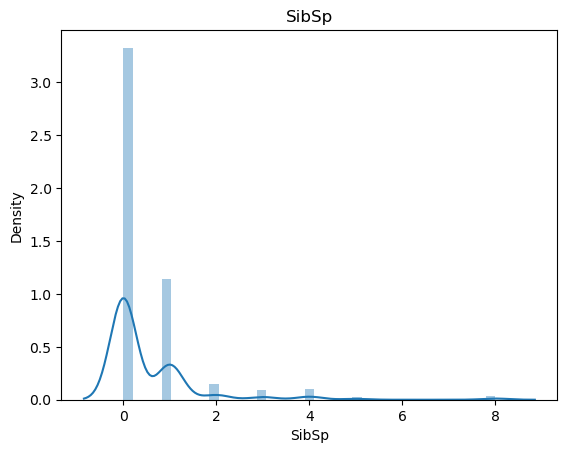

C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


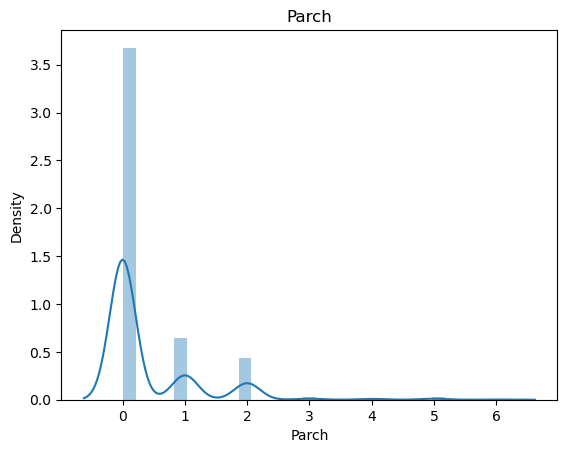

C:\Users\KRIZAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


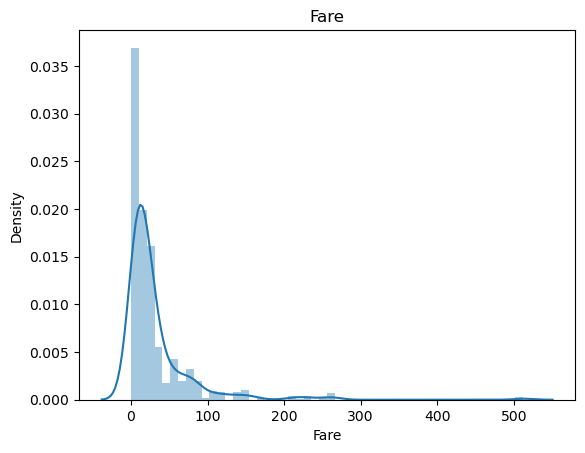

In [17]:
# Checking Skewness

for i in ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    skew_data = data[i].skew()
    print(skew_data)
    
    

# Plotting Skewness

for i in ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    sns.distplot(data[i])
    plt.title(i)
    plt.show()

**Removing Skewness** 

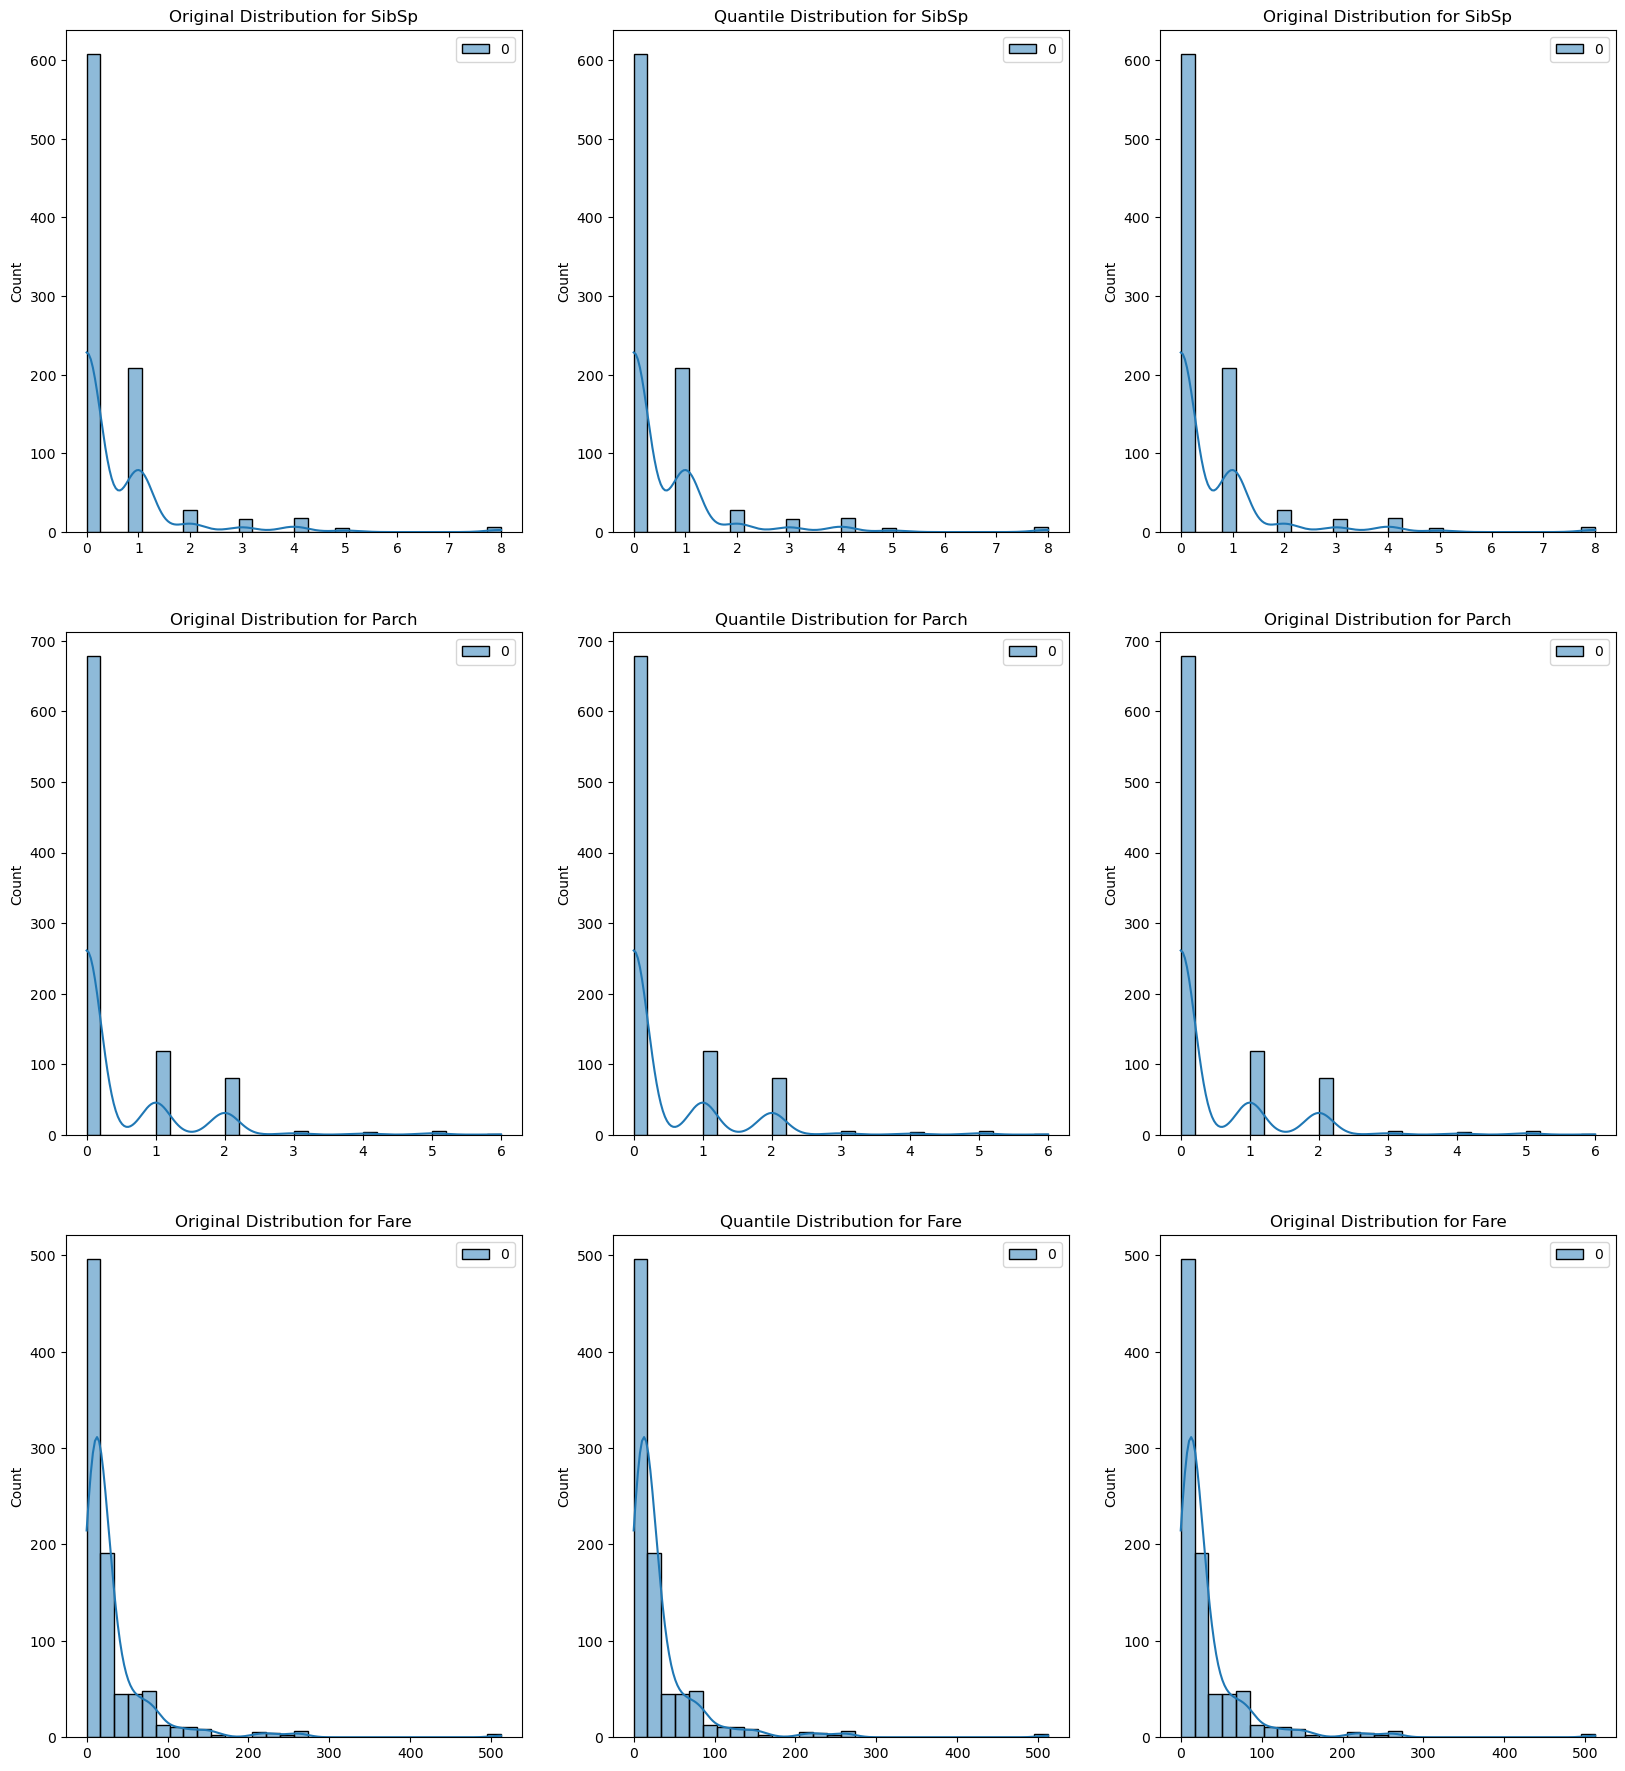

In [18]:
cols = ['SibSp', "Parch", 'Fare']
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles = 500, output_distribution = "normal")
    fig = plt.figure(figsize = (20, 30))
    j = 1
    for i in columns:
        array = np.array(data[i]).reshape(-1,1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(4,3,j)
        sns.histplot(array, bins = 30, kde = True)
        plt.title("Original Distribution for {}".format(i))
        plt.subplot(4,3,j+1)
        sns.histplot(array, bins = 30, kde = True)
        plt.title("Quantile Distribution for {}".format(i))
        plt.subplot(4,3,j+2)
        sns.histplot(array, bins = 30, kde = True)
        plt.title("Original Distribution for {}".format(i))
        j += 3
        data[i] = x
        
test_transformers(cols)
    

In [19]:
for i in ['SibSp', "Parch", 'Fare']:
    skew_data = data[i].skew()
    print(skew_data)

0.8700077223436288
1.2575291603860173
-0.9222474718589766


Now the skewness has been reduced to the range (-1, 1), only Parch has still the value 1.25 which is negligible.

### Outlier Detection 

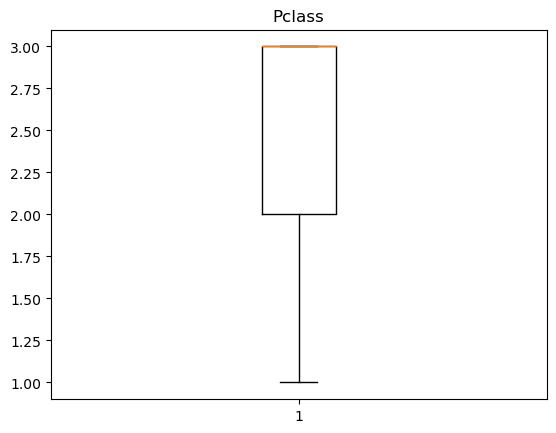

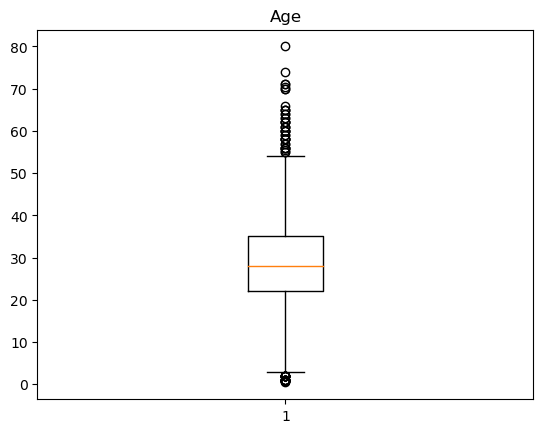

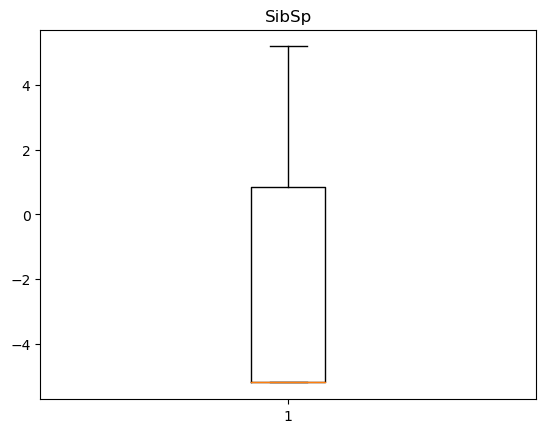

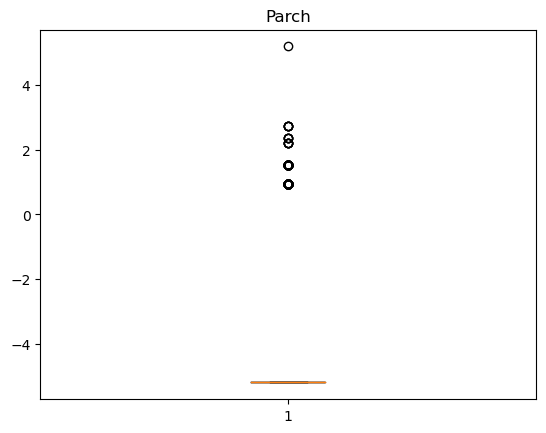

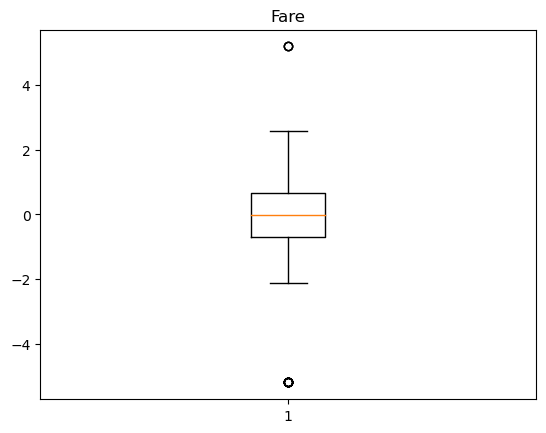

In [20]:
for i in num_feature:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

**Finding the indexes with outliers**

In [21]:
for i in ["Age", "Parch", "Fare"]:
    
    # Inter Quartile Range
    
    Q1 = np.percentile(data[i], 25,interpolation="midpoint")
    Q2 = np.percentile(data[i], 50,interpolation="midpoint")
    Q3 = np.percentile(data[i], 75,interpolation="midpoint")
    print("Interquartile range: {} \n".format(i))
    print("Q1: {}".format(Q1))
    print("Q2: {}".format(Q2))
    print("Q3: {}\n".format(Q3))
    
    IQR = Q3-Q1
    print("IQR:{}\n".format(IQR))
    
    # Limit identification
    
    low_limit = Q1-1.5*IQR
    up_limit  = Q3+1.5*IQR
    print("Lower limit : {}".format(low_limit))
    print("Upper limit : {}\n".format(up_limit))
    
    
    # Finding outlier
    
    outlier= []
    for x in data[i]:
        if ((x>up_limit) or (x<low_limit)):
            outlier.append(x)
    print("Outlier: {}\n".format(outlier))
    
    
    # Finding index colum with outlier
    
    #upper limit outlier

    ind_up      = data[i]>up_limit
    ind_updata  = data.loc[ind_up].index
    print("Indexes greater than upperlimit: {}\n".format(ind_updata))
    
    
    
    # lower limit outlier
    
    ind_low     = data[i]<low_limit
    ind_lowdata = data.loc[ind_low].index
    print("Indexes less than lowerlimit: {}\n".format(ind_lowdata))
    print("\n\n")
    
    
    # Dropping indexex with outliers
    
    # data.drop(ind_updata, axis = 0, inplace = True)
    # data.drop(ind_lowdata, axis = 0, inplace = True)
    
    # axis =0 indicate the rows

Interquartile range: Age 

Q1: 22.0
Q2: 28.0
Q3: 35.0

IQR:13.0

Lower limit : 2.5
Upper limit : 54.5

Outlier: [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]

Indexes greater than upperlimit: Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

Indexes less than lowerlimit: Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dt

It can be seen that the data has many outliers in it and its removal affects certain columns we are not removing outliers.

### Correlation Matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,0.093829,0.140271,0.309509
Pclass,-0.338481,1.000000,-0.339898,-0.051164,-0.020882,-0.551902
Age,-0.064910,-0.339898,1.000000,-0.161269,-0.246864,0.081817
SibSp,0.093829,-0.051164,-0.161269,1.000000,0.445010,0.367622
Parch,0.140271,-0.020882,-0.246864,0.445010,1.000000,0.347635
Fare,0.309509,-0.551902,0.081817,0.367622,0.347635,1.000000


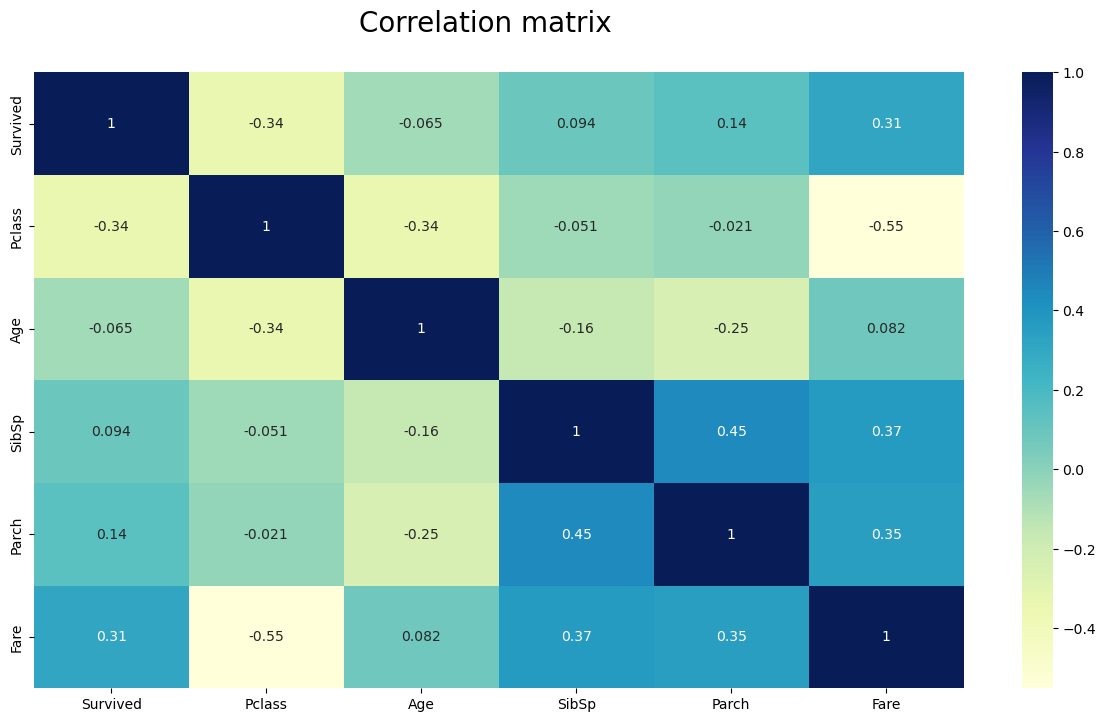

In [22]:
corrmatrix = data.corr()
plt.subplots(figsize =(15,8))
plt.title("Correlation matrix   \n", size = 20)
sns.heatmap(corrmatrix, annot=True, cmap="YlGnBu")
corrmatrix

In [23]:
data.drop(["Ticket"], axis = 1, inplace =True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,0.840190,-5.199338,-1.371110,B96 B98,S
1,1,1,female,38.0,0.840190,-5.199338,1.196857,C85,C
2,1,3,female,26.0,-5.199338,-5.199338,-0.641740,B96 B98,S
3,1,1,female,35.0,0.840190,-5.199338,0.989036,C123,S
4,0,3,male,35.0,-5.199338,-5.199338,-0.537123,B96 B98,S


### Label Encoding 

In [24]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in ['Sex', 'Cabin', 'Embarked']:
    data[i] =  le.fit_transform(data[i])

In [26]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,0.840190,-5.199338,-1.371110,47,2
1,1,1,0,38.0,0.840190,-5.199338,1.196857,81,0
2,1,3,0,26.0,-5.199338,-5.199338,-0.641740,47,2
3,1,1,0,35.0,0.840190,-5.199338,0.989036,55,2
4,0,3,1,35.0,-5.199338,-5.199338,-0.537123,47,2
5,0,3,1,28.0,-5.199338,-5.199338,-0.446237,47,1
6,0,1,1,54.0,-5.199338,-5.199338,0.929354,129,2
7,0,3,1,2.0,1.726996,0.944940,0.246092,47,2
8,1,3,0,27.0,-5.199338,1.545421,-0.225432,47,2
9,1,2,0,14.0,0.840190,-5.199338,0.638283,47,0


### MinMax Scaling 

In [27]:
x = data.drop(['Sex', 'Cabin', 'Embarked', "Survived"], axis = 1)
x.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,0.840190,-5.199338,-1.371110
1,1,38.0,0.840190,-5.199338,1.196857
2,3,26.0,-5.199338,-5.199338,-0.641740
3,1,35.0,0.840190,-5.199338,0.989036
4,3,35.0,-5.199338,-5.199338,-0.537123


In [28]:
y = data[['Sex', 'Cabin', 'Embarked', "Survived"]]
y.head()

,Sex,Cabin,Embarked,Survived
0,1,47,2,0
1,0,81,0,1
2,0,47,2,1
3,0,55,2,1
4,1,47,2,0


In [29]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range= (0,1))
x1 = minmax.fit_transform(x)

In [30]:
x1 = pd.DataFrame(x1, columns=["Pclass", "Age", "SibSp", "Parch", "Fare"])
x1 = pd.concat([x1,y], axis=1)
x1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked,Survived
0,1.0,0.271174,0.580798,0.0,0.368146,1,47,2,0
1,0.0,0.472229,0.580798,0.0,0.615097,0,81,0,1
2,1.0,0.321438,0.000000,0.0,0.438286,0,47,2,1
3,0.0,0.434531,0.580798,0.0,0.595112,0,55,2,1
4,1.0,0.434531,0.000000,0.0,0.448347,1,47,2,0


### Splitting Target and Independent Variables 

In [31]:
x = data.drop('Survived',axis = 1)
y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

## Classification Models 

### 1) kNN Model

In [32]:
metric_k  = []
neighbors = np.arange(3, 15)


for k in neighbors:
    knn       =  KNeighborsClassifier(n_neighbors = k)
    knn_model =  knn.fit(x_train,y_train)
    #knn_pred  =  knn_model.predict(x_test)
    
score_knn = knn_model.score(x_test, y_test)
score_knn

C:\Users\KRIZAL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7533632286995515

### 2)  Support Vector Machine (SVM) Model

In [33]:
# svm kernal rbf

svm1       = SVC(kernel = "rbf")
svm_model1 = svm1.fit(x_train, y_train)

In [34]:
# svm kernal poly

svm2        = SVC(kernel = "poly")
svm_model2  = svm2.fit(x_train, y_train)

In [35]:
# svm kernal linear

svm3 = SVC(kernel = "linear")
svm_model3 = svm3.fit(x_train, y_train)

## k-Fold cross validation 

In [36]:
kfold_validator = KFold(10) #number of folds is 10
for train_index, test_index in kfold_validator.split(x, y):
    print("Training index\n", train_index)
    print("\n")
    print("Testing index\n", test_index)
    print("\n\n")

Training index
 [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

### k-Fold Cross Validation for kNN Model

In [37]:
# Printing the validation result

cv_knn = cross_val_score(knn_model, x, y, cv = kfold_validator)
print("Validation result : ", cv_knn) 
print("\nAverage of Cross validation result ", np.mean(cv_knn))

Validation result :  [0.71111111 0.75280899 0.71910112 0.64044944 0.71910112 0.69662921
 0.62921348 0.75280899 0.78651685 0.75280899]

Average of Cross validation result  0.7160549313358302


C:\Users\KRIZAL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KRIZAL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

### k- Fold Cross Validation for SVM Kernal = rbf 

In [38]:
# Printing the validation result

cv_rbf = cross_val_score(svm_model1, x, y, cv = kfold_validator)
print("Validation result : ", cv_rbf) 
print("\nAverage of Cross validation result ", np.mean(cv_rbf))

Validation result :  [0.61111111 0.75280899 0.64044944 0.60674157 0.64044944 0.68539326
 0.6741573  0.65168539 0.69662921 0.68539326]

Average of Cross validation result  0.6644818976279651


### k- Fold Cross Validation for SVM Kernal = poly 

In [39]:
# Printing the validation result

cv_poly = cross_val_score(svm_model2, x, y, cv = kfold_validator)
print("Validation result : ", cv_poly) 
print("\nAverage of Cross validation result ", np.mean(cv_poly))

Validation result :  [0.57777778 0.78651685 0.62921348 0.57303371 0.61797753 0.6741573
 0.62921348 0.64044944 0.65168539 0.6741573 ]

Average of Cross validation result  0.6454182272159801


### k- Fold Cross Validation for SVM Kernal = linear 

In [40]:
# Printing the validation result

cv_lin = cross_val_score(svm_model3, x, y, cv = kfold_validator)
print("Validation result : ", cv_lin) 
print("\nAverage of Cross validation result ", np.mean(cv_lin))

Validation result :  [0.81111111 0.82022472 0.75280899 0.84269663 0.76404494 0.79775281
 0.74157303 0.73033708 0.84269663 0.76404494]

Average of Cross validation result  0.786729088639201


## Stratified Cross Validation 

In [41]:
skfold_validator = StratifiedKFold(n_splits = 10)
for train_index, test_index in skfold_validator.split(x, y):
    print("Training index\n", train_index)
    print("\n")
    print("Testing index\n", test_index)
    print("\n\n")

Training index
 [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

#### Stratified Cross Validation for kNN 

In [42]:
# Printing the validation result
    
skcv_knn = cross_val_score(knn_model, x, y, cv = skfold_validator)
print("Validation result : ", skcv_knn)
print("\nAverage of Cross validation result ", np.mean(skcv_knn))

Validation result :  [0.72222222 0.71910112 0.69662921 0.70786517 0.75280899 0.66292135
 0.65168539 0.74157303 0.76404494 0.74157303]

Average of Cross validation result  0.7160424469413235


C:\Users\KRIZAL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KRIZAL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

#### Stratified Cross Validation for SVM = rbf 

In [43]:
# Printing the validation result
    
skcv_rbf = cross_val_score(svm_model1, x, y, cv = skfold_validator)
print("Validation result : ", skcv_rbf)
print("\nAverage of Cross validation result ", np.mean(skcv_rbf))

Validation result :  [0.64444444 0.65168539 0.65168539 0.66292135 0.68539326 0.6741573
 0.68539326 0.64044944 0.68539326 0.6741573 ]

Average of Cross validation result  0.6655680399500624


#### Stratified Cross Validation for SVM = poly 

In [44]:
# Printing the validation result
    
skcv_poly = cross_val_score(svm_model2, x, y, cv = skfold_validator)
print("Validation result : ", skcv_poly)
print("\nAverage of Cross validation result ", np.mean(skcv_poly))

Validation result :  [0.63333333 0.6741573  0.62921348 0.65168539 0.66292135 0.65168539
 0.6741573  0.62921348 0.62921348 0.65168539]

Average of Cross validation result  0.6487265917602996


#### Stratified Cross Validation for SVM = linear 

In [45]:
# Printing the validation result
    
skcv_lin = cross_val_score(svm_model3, x, y, cv = skfold_validator)
print("Validation result : ", skcv_lin)
print("\nAverage of Cross validation result ", np.mean(skcv_lin))

Validation result :  [0.81111111 0.79775281 0.76404494 0.84269663 0.79775281 0.7752809
 0.76404494 0.74157303 0.80898876 0.76404494]

Average of Cross validation result  0.786729088639201


The average cross validation result for models using k-fold cross validation are:

knn - 0.71

svm rbf kernal - 0.66

svm poly kernal- 0.64

svm linear kernal - 0.78


The average cross validation result for models using Stratified Cross Validation are:

knn - 0.71

svm rbf kernal - 0.66

svm poly kernal- 0.64

svm linear kernal - 0.78


**Based on both k fold and Stratified Cross Validation methods Svm linear kernal has the highest average, so that model can be taken to classify this dataset.**